# Wisconsin Breast Cancer EDA

### Team Members:
* Frederick, Chris (Project Leader)
* Pyakurel, Ashmit
* Dutta, Debashish 

### Import the libraries used in this analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Select a style, it will affect all subsequent plots.
# This also gives us the non-default colors
plt.style.use('fivethirtyeight')

### Let's load in our dataset
As we load our dataset, we will also rename our columns based on the data dictionary provided in the directions.

In [2]:
col_names = ['sample_code_number', 'clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nuclei','mitoses','class']
df = pd.read_csv('data-sets/Breast-Cancer-Wisconsin.csv', skiprows=1, names=col_names)

### Let's check for any null values
As you can see from below, our dataset contains 699 rows of data, and all 699 columns contain 699 non-null values.  This means we don't have any nulls to handle.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
sample_code_number             699 non-null int64
clump_thickness                699 non-null int64
uniformity_of_cell_size        699 non-null int64
uniformity_of_cell_shape       699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    699 non-null object
bland_chromatin                699 non-null int64
normal_nuclei                  699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Do we have "placeholder" values we need to replace with NaN?
By looking at df.info() above I can see that the column, bare-nuclei was returned as a string.  This is a red flag, because this column should only contain integers between 1 and 10.

Let's check what values we have for bare_nuclei

In [4]:
df.bare_nuclei.value_counts()
print("We have", (df.bare_nuclei == "?").sum(), "?'s that need to be replaced!")

We have 16 ?'s that need to be replaced!


In [5]:
# We will replace ? with '0' so that we can convert the column to a integer using astype()
df.bare_nuclei.replace('?', '0', inplace=True)
df.bare_nuclei = df.bare_nuclei.astype(dtype=int)

In [6]:
df.bare_nuclei.value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
0      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

Now we will double check df.info() to make sure are our variables are of the desired type.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
sample_code_number             699 non-null int64
clump_thickness                699 non-null int64
uniformity_of_cell_size        699 non-null int64
uniformity_of_cell_shape       699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    699 non-null int64
bland_chromatin                699 non-null int64
normal_nuclei                  699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


### Now let's impute the value for our missing bare_nuclei values.

In [8]:
# convert our 0 placeholder back to NaN so it does 
# not mess with our median function
df.bare_nuclei.replace(0, np.NaN, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
sample_code_number             699 non-null int64
clump_thickness                699 non-null int64
uniformity_of_cell_size        699 non-null int64
uniformity_of_cell_shape       699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    683 non-null float64
bland_chromatin                699 non-null int64
normal_nuclei                  699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [9]:
# We will replace with the mean, however, based on the distribution of this column the median might have been better.
print("We will replace the NaN with:", int(df.bare_nuclei.mean()))
df.bare_nuclei.fillna(value=df.bare_nuclei.mean(), inplace=True)
df.bare_nuclei = df.bare_nuclei.astype(dtype=int)
df.info()

We will replace the NaN with: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
sample_code_number             699 non-null int64
clump_thickness                699 non-null int64
uniformity_of_cell_size        699 non-null int64
uniformity_of_cell_shape       699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    699 non-null int64
bland_chromatin                699 non-null int64
normal_nuclei                  699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


### Now let's display some summary statstics

In [10]:
df.describe()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nuclei,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.532189,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.602774,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [11]:
# Confirm the number of columns and rows.
df.shape

(699, 11)

### Next, let's plot histograms for each variable so we can inspect the distributions.
Notice that the distribution for class only contains the values 2 and 4.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10931c128>,
      dtype=object)

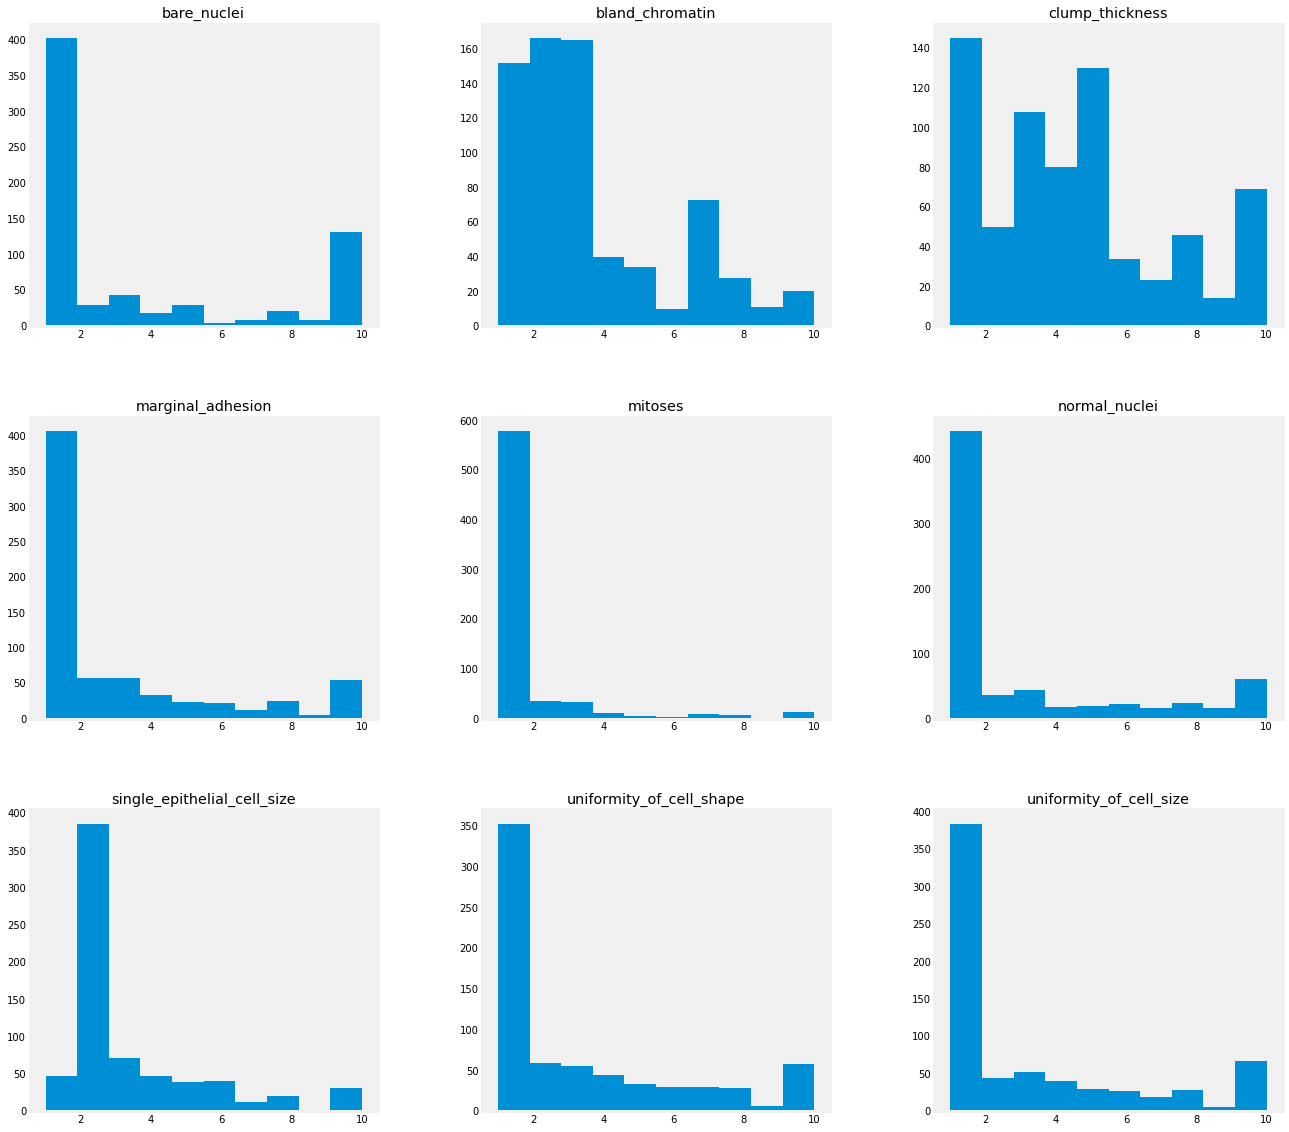

In [12]:
df.loc[:,"clump_thickness": "mitoses"].hist(figsize=(20,20), bins=10, grid=False)

### Let's inspect Class with a bar chart

Draw a bar plot for CLASS - you can use groupby to see counts of  benign and malignant values or you can count values directly using pd.value_counts() function and apply it to plot.bar() function.
Draw a scatterplot of any two columns. 

Text(0,0.5,'count')

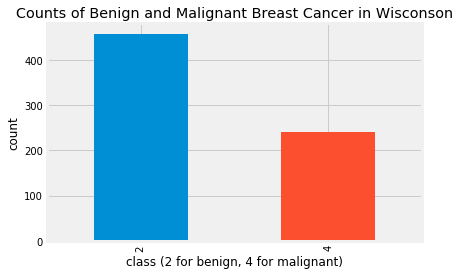

In [19]:
ax = df['class'].value_counts().plot.bar(title="Counts of Benign and Malignant Breast Cancer in Wisconson")
ax.set_xlabel("class (2 for benign, 4 for malignant)", fontsize=12)
ax.set_ylabel("count", fontsize=12)

### Let's inspect to see if there is a correlation between bland chromatin and clump thickness

Text(0.5,1,'Correlation between bland chromatin and clump thickness')

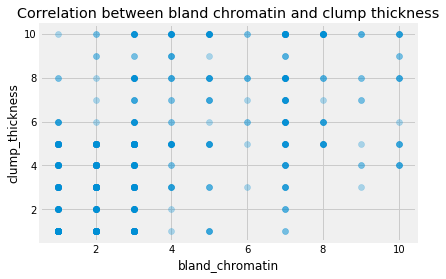

In [25]:
figure, ax = plt.subplots()
ax.scatter(x=df.bland_chromatin, y=df.clump_thickness, alpha=.3)
ax.set_xlabel('bland_chromatin')
ax.set_ylabel('clump_thickness')
ax.set_title('Correlation between bland chromatin and clump thickness')

### Part 1 - Summary

After inspecting this data, I wondered which columns I need to normalize and which I need to standardize.  Because normalization makes training less sensitive to the scale of features I looked at that first.  In this case, all of our measures scale between 1 and 10, and thus appear to already be normalized.

As for standardization, this adjust our data so that our data is centered around it's mean. If we are doing PCA, the output can only be interpreted correctly when the features have first been centred around their means.  Therefore, I would standardize the following columns:
* clump_thickness
* uniformity_of_cell_size
* uniformity_of_cell_shape
* marginal_adhesion
* single_epithelial_cell_size
* bare_nuclei
* bland_chromatin
* normal_nuclei
* mitoses
